In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fid = pd.read_csv('../../RBC_fid_table.csv')
fid.head(2)

,Barcodes,Sets,Types,Timepoint,Position,FileName
0,ATCACG,8,S24,0,ATCACG,ATCACG-s_5_1
1,TTAGGC,8,S24,1,TTAGGC,TTAGGC-s_5_1


In [3]:
fileset = 'ATCACG-s_5_1'
filename= 'gene_TXCDUTR_ReadOutput_processedData_24filesDec_ACAGTG-s_5_1_shift15.txt'

In [4]:
txcdutr = pd.read_csv('txcdutr/'+filename,sep='\t')
del txcdutr['AccNum']
del txcdutr['ExonReads']
del txcdutr['RefseqReads']
del txcdutr['GenomeRefseqReads']
txcdutr.head(3)

,IntronReads,CD_GenomeRefseqReads,fpUTR_reads,tpUTR_reads
0,8.0,144.0,2.0,11.0
1,0.0,6.0,0.0,5.0
2,0.0,471.0,36.0,3.0


In [5]:
res = txcdutr[['IntronReads','fpUTR_reads','tpUTR_reads']].div(txcdutr.CD_GenomeRefseqReads, axis=0)
res.dropna(inplace=True)
res.reset_index(drop=True, inplace=True)
#del res['level_0']
#del res['index']
res

,IntronReads,fpUTR_reads,tpUTR_reads
0,0.055556,0.013889,0.076389
1,0.000000,0.000000,0.833333
2,0.000000,0.076433,0.006369
3,0.000000,0.000000,0.000000
4,0.006590,0.014827,0.014827
...,...,...,...
13577,0.043814,0.007732,0.033505
13578,0.153846,0.384615,0.000000
13579,0.019444,0.074747,0.011364
13580,0.173913,0.173913,0.217391


In [13]:
df = res.stack().reset_index()
df.columns = ['_', 'x', 'y']
#df.y=np.log(df.y)/np.log(10)
df = df.loc[df.y>0.01]

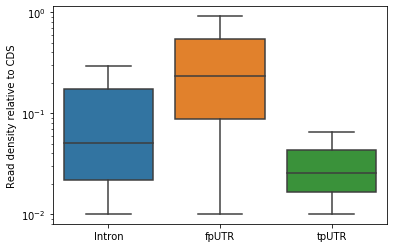

In [21]:
ax=sns.boxplot(x='x',y='y',#hue='hue',
           data=df,showfliers = False,whis=0.8)
ax.set_yscale('log')
ax.set_xticklabels(['Intron','fpUTR','tpUTR'])
ax.set_ylabel('Read density relative to CDS')
ax.set_xlabel('')
fig = ax.get_figure()
#fig.savefig('sample.eps')
#ax.set_yticklabels()

In [65]:
ax.ytick

AttributeError: 'AxesSubplot' object has no attribute 'ytick'